# Lesson 2 - Data Cleaning and Visualization

![](https://64.media.tumblr.com/0492674d7a95e7e5bc20afd79f8bb98b/tumblr_owtcd2sWVf1toamj8o2_400.gifv)

Last lesson finished with a demo of creating and training a model with scikit-learn, and we saw that it only requires a couple of lines of code. We'll look at some more complex examples in lesson 3, but the key takeaway from that example is that the process is pretty easy *IF* your data is ready. This lesson is all about getting to that point.

We'll look at some example datasets and in the process we'll talk about:
- How to quickly get a feel for a dataset
- Things to look out for
- Useful visualizations
- Dealing with missing data
- 'Feature Engineering'
- Tips for enriching your datasets

Let's get started.

##  Initial Inspection


![](https://i.ebayimg.com/images/g/pqsAAOSwcBhWYGUu/s-l300.jpg)


Encountering data in courses like this is always a little weird - in real-world scenarios you'll often know a lot about the data you're about to be working with (but not always!). But for a course like this we'll be pulling up data from all over the place for illustrative purposes. Don't worry too much about the nitty-gritty details - we'll try to give a bit of introduction to each dataset, and you're welcome to go deeper, but feel free to just take them as they come and figure things out if you need them :)

For example, this dataset comes from the UCI machine learning repository, which has lots of useful example datasets. It's called the 'adult' dataset, and focuses on predicting the income class of people in America given some backgound information on them. You can read about the data [here](http://archive.ics.uci.edu/ml/datasets/adult) - that page links to the raw data as well as some metadata such as the 'names' file which I used to generate the list of column headings used below.

The first things I do afeter loading a dataset is to print the shape and view the first few rows to check that there aren't any glaring errors and that we have about as much data as we were expecting.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Load the data
names = ['age','workclass','fnlwgt','education','education-num',
         'marital-status','occupation','relationship','race','sex',
         'capital-gain','capital-loss','hours-per-week','native-country', 'income_class']

adults = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                     names=names, )
print(adults.shape)
adults.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Take a minute to look at the different columns. Do the values seem to match the column headings? What kind of data does each column contain? Does anything look weird? Looking at the output above, I have no clue what `fnlwgt` is but besides that it all looks fairly sensible. We'll talk about the different kinds of data shortly, but for now let's look at four other useful functions worth bringing up at this early inspection stage:

#### 1) .describe()

The `describe` function gives us useful summaries of any numerical columns. Looking at the average (mean), min and max can be a useful check to make sure the variable behaves as you'd expect. For example, here we can see that age ranges from 17 to 90, with an average age of 38.6. If there was a max age of 150, you'd want to investigate that. Check the other columns - does anything look weird?



In [ ]:
adults.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### 2) .info()

Different columns in a dataframe can be different data types. For example, numbers might be represented as integers (int64) or floating point numbers (float) while strings are stored as a special 'object' type. Pandas guesses these types automatically, but it can sometimes have confusing results. For example, if there is one row with a string (eg 'missing') in a column of numbers then pandas will treat the whole column as type object, and you won't be able to see stats with `describe()` or use functions like `.mean()`. 

In [ ]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income_class    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In this case the data looks fine. If you end up with columns treated as the wrong type, try to fiure out *why* and then fix it by replacing the troublesome values (the `replace()` function should do the trick) or force cconversion to your desired type with the `astype()` function.

#### 3) sample

Using `.head()` can hide errors if the problems aren't present in the first 5 rows. For example, you may have data ordered by the time it was collected, and later rows could have missing values. You could use `.tail()` to see the final few rows, but again the errors might lurk in the center of the dataframe. Looking at a random sample from the data can often be instructive. Here, let's look at 5 random rows to check everything looks OK:

In [ ]:
adults.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
7437,18,?,80564,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,60,United-States,<=50K
19836,34,Private,154667,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,<=50K
16123,20,?,133061,9th,5,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
17615,35,Private,166193,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
15957,23,Private,520231,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K


#### 4) isna

I've mentioned missing values a few times. Pandas represents missing data with a special NaN object (np.NaN). This particular dataset doesn't have any missing data, but in general we can check if there is any by combining the `.isna()` function (which returns True or False for each value) with the `sum()` function which let's us tally the number of 'Trues' in each column to get the total number of missing values.

In [ ]:
adults.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_class      0
dtype: int64

With no missing values in any columns, we can move on to a deeper exploration of the data.

## Going Deeper

![](https://thumbs.nosto.com/quick/bigcommerce-ufhcuzfxw9/8/12759/6b13018878c8ac0e9a8511dd289799cdb9011fd4d7943eff07999ee5799b53aba/A)

With initial inspection done, we have some options that might give us more insight.

#### Plotting Distributions

For a numeric column such as age, it can be useful to see the *distribution* of the data. For this, the hist function gives us a nice visual representation. 

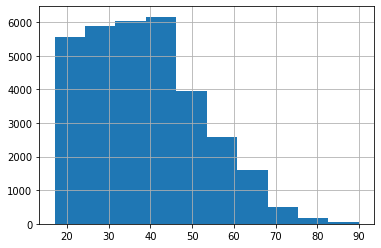

In [ ]:
adults['age'].hist()

#### Correlation

We can calculate the corellation between numerical columns with `.corr()`. This is especially useful when our 'target' colum is numerical - it might show which columns are most strongly related to the target. 



In [ ]:
adults.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


There are ways of making this colourful and pretty, which can help pick out unusual values in dataframes with more clumns, but I'll leave that for you to research :) In this case there isn't much to write home about here, but if there were some high correlation values we might want to take a closer look with a scatter plot:

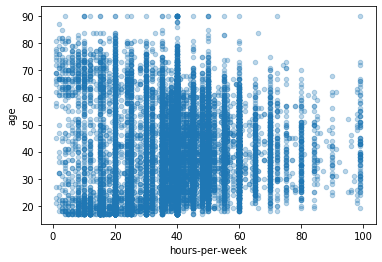

In [ ]:
adults.plot(x='hours-per-week', y='age', kind='scatter', alpha=0.3)

Not very obvious there!

For the lazy, there is a useful function to plot all the scatter-plots at once. Warning: this can take a while with larger dataframes!

In [ ]:
# pd.plotting.scatter_matrix(adults) # Uncomment to view. Can you make it better?

It might feel like a waste of time to be creating all these visualizations - don't we want to get straight to the modelling? But we are visual creatures, and these plots can reveal issues that we might miss trying to look through simple tables of values. To illustrate this, I'm going to re-visit a plot we made in Lesson 1:

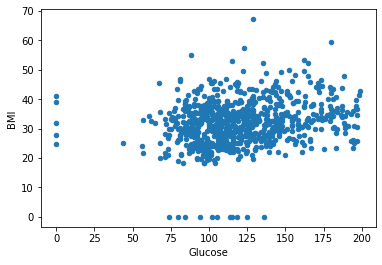

In [ ]:
# The diabetes dataset
diabetes = pd.read_csv('https://raw.githubusercontent.com/surabhim/Diabetes/master/Diabetes.csv', # URL
                 skiprows=9, # What's this? Look at the file - it breaks the convention
                 names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']) # Most have column names
diabetes.plot(x='Glucose', y='BMI', kind='scatter')

Notice anything? On both axes are a smattering of points. I'm no doctor, but I don't think a BMI of 0 sounds healthy - this may be missing data we should investigate further.

## Categorical Variables

So far we've looked at techniques for examining numerical columns - let's remedy that. Categorical data is split into discrete classes/groups/options. For example, a 'Gender' column might contain 'Male', 'Female', 'Other' and 'PreferNotToSay'. When it comes time to model, we'll need to think about how we turn these columns into numerical values the model can use as inputs.

In some cases, categories do have an obvious ordering. For example, eduction completed might be 'high school', 'bachelors', 'masters', 'phd' - this is called an *ordinal variable*, and we can get away with encoding these as 1, 2, 3 and 4 respectively. But in the gender example above, there is no implied ordering that would make sense.

For both modelling and visualization, it often makes sense to look at the different categories individually. 

Let's quickly run through some useful functions for working with this kind of data:

In [ ]:
adults['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
adults['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
adults.groupby('education').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


In [ ]:
# .count()....

## Exercise

Take a look at the [Sendy Logistics Challenge on Zindi](https://zindi.africa/competitions/sendy-logistics-challenge). You'll need to register on Zindi to join the competition and access the data, which comes as 5 separate files:
- Train.csv - is the dataset that you will use to train your model.
- Test.csv - is the dataset on which you will apply your model to.
- Riders.csv - contains unique rider Ids, number of orders, age, rating and number of ratings
- VariableDefinitions.csv - Definitions of variables in the Train, Test and Riders files
- SampleSubmission.csv - Shows the submission format (we'll look at this later, in lesson 4)

1) Load and inspect the data from Train.csv. Any missing data? What is the target column?
2) How common are the different vehicle types? Is there a difference in the trip time or distance depending on vehicle type?
3) What columns are highly correlated (positively or negatively) with the target? Plot some scatter plots to visualize the relationships

## Dates

In [ ]:
# TODO

## Missing Data

In [ ]:
# Counting missing values

In [ ]:
# Visualizing with missinggo

In [ ]:
# Replace or Drop?

## Pandas Merge and Concat

In [ ]:
# Concat

In [ ]:
# Merge

In [ ]:
# Exercise: Sendy

## Getting Funky with Lambda Functions

In [ ]:
# Parsing Strings

In [ ]:
# Checking files exist

In [ ]:
# Advanced: Loading images and getting sizes

## Visualization Exercise:

Find data fill values make plots